In [1]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.optimizers import Adam
import numpy as np

filename = "Data/XML/xml_dataset.npz"

# Load numpy array
dataset = np.load(filename)

x_dataset_full = dataset['x']
y_dataset_full = dataset['y']

x_test = x_dataset_full[3200:4000]
y_test = y_dataset_full[3200:4000]

x_dataset = x_dataset_full[:3200]
y_dataset = y_dataset_full[:3200]

x_val = x_dataset[2560:]
y_val = y_dataset[2560:]

x_train = x_dataset[:2560]
y_train = y_dataset[:2560]

# Assign and reshape data
x_train, y_train = x_train.reshape(2560, 1280, 64), y_train.reshape(2560, 1280, 64)
x_val, y_val = x_val.reshape(640, 1280, 64), y_val.reshape(640, 1280, 64)
x_test, y_test = x_test.reshape(800, 1280, 64), y_test.reshape(800, 1280, 64)

print("Training shape: ", x_train.shape, y_train.shape)
print("Validation shape: ", x_val.shape, x_val.shape)
print("Test shape: ", x_test.shape, y_test.shape)

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Training shape:  (2560, 1280, 64) (2560, 1280, 64)
Validation shape:  (640, 1280, 64) (640, 1280, 64)
Test shape:  (800, 1280, 64) (800, 1280, 64)


In [2]:
# Base model
model = Sequential()
model.add(LSTM(64, input_shape=(1280, 64), return_sequences=True))
model.summary()
adam = Adam(lr=0.00005)
model.compile(optimizer=adam, loss='mean_absolute_error', metrics=['acc'])

# Fitting the model
history = model.fit(x_train, y_train,
                    epochs=400,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1280, 64)          33024     
Total params: 33,024
Trainable params: 33,024
Non-trainable params: 0
_________________________________________________________________
Train on 2560 samples, validate on 640 samples
Epoch 1/400
2560/2560 [==============================] - 93s 36ms/step - loss: 0.0363 - acc: 0.0199 - val_loss: 0.0117 - val_acc: 0.0014
Epoch 2/400
2560/2560 [==============================] - 85s 33ms/step - loss: 0.0338 - acc: 0.0547 - val_loss: 0.0108 - val_acc: 0.0012
Epoch 3/400
2560/2560 [==============================] - 84s 33ms/step - loss: 0.0322 - acc: 0.0027 - val_loss: 0.0102 - val_acc: 0.0012
Epoch 4/400
2560/2560 [==============================] - 87s 34ms/step - loss: 0.0310 - acc: 0.0267 - val_loss: 0.0098 - val_acc: 8.8745e-04
Epoch 5/400
2560/2560 [==============================] - 87s 34ms/s

2560/2560 [==============================] - 78s 31ms/step - loss: 0.0246 - acc: 0.0011 - val_loss: 0.0073 - val_acc: 7.2876e-04
Epoch 56/400
2560/2560 [==============================] - 78s 31ms/step - loss: 0.0245 - acc: 0.0229 - val_loss: 0.0073 - val_acc: 7.2876e-04
Epoch 57/400
2560/2560 [==============================] - 78s 30ms/step - loss: 0.0245 - acc: 0.1199 - val_loss: 0.0073 - val_acc: 7.2876e-04
Epoch 58/400
2560/2560 [==============================] - 78s 31ms/step - loss: 0.0245 - acc: 0.0010 - val_loss: 0.0073 - val_acc: 7.2876e-04
Epoch 59/400
2560/2560 [==============================] - 79s 31ms/step - loss: 0.0245 - acc: 9.3781e-04 - val_loss: 0.0073 - val_acc: 7.2876e-04
Epoch 60/400
2560/2560 [==============================] - 80s 31ms/step - loss: 0.0244 - acc: 0.0021 - val_loss: 0.0072 - val_acc: 7.2876e-04
Epoch 61/400
2560/2560 [==============================] - 79s 31ms/step - loss: 0.0244 - acc: 0.0227 - val_loss: 0.0072 - val_acc: 7.2876e-04
Epoch 62/400
25

2560/2560 [==============================] - 78s 30ms/step - loss: 0.0239 - acc: 0.0015 - val_loss: 0.0070 - val_acc: 6.0547e-04
Epoch 113/400
2560/2560 [==============================] - 78s 30ms/step - loss: 0.0239 - acc: 0.0507 - val_loss: 0.0070 - val_acc: 6.0547e-04
Epoch 114/400
2560/2560 [==============================] - 77s 30ms/step - loss: 0.0239 - acc: 0.0015 - val_loss: 0.0070 - val_acc: 6.0547e-04
Epoch 115/400
2560/2560 [==============================] - 77s 30ms/step - loss: 0.0239 - acc: 0.0029 - val_loss: 0.0070 - val_acc: 6.0425e-04
Epoch 116/400
2560/2560 [==============================] - 77s 30ms/step - loss: 0.0239 - acc: 0.0257 - val_loss: 0.0070 - val_acc: 6.0425e-04
Epoch 117/400
2560/2560 [==============================] - 78s 30ms/step - loss: 0.0239 - acc: 0.0016 - val_loss: 0.0070 - val_acc: 4.3579e-04
Epoch 118/400
2560/2560 [==============================] - 77s 30ms/step - loss: 0.0239 - acc: 0.0016 - val_loss: 0.0070 - val_acc: 4.3579e-04
Epoch 119/400

2560/2560 [==============================] - 77s 30ms/step - loss: 0.0238 - acc: 0.0034 - val_loss: 0.0070 - val_acc: 0.0051
Epoch 171/400
2560/2560 [==============================] - 80s 31ms/step - loss: 0.0238 - acc: 0.0034 - val_loss: 0.0070 - val_acc: 0.0051
Epoch 172/400
2560/2560 [==============================] - 80s 31ms/step - loss: 0.0238 - acc: 0.0036 - val_loss: 0.0070 - val_acc: 0.0051
Epoch 173/400
2560/2560 [==============================] - 80s 31ms/step - loss: 0.0238 - acc: 0.0283 - val_loss: 0.0070 - val_acc: 0.0051
Epoch 174/400
2560/2560 [==============================] - 79s 31ms/step - loss: 0.0238 - acc: 0.0034 - val_loss: 0.0070 - val_acc: 0.0051
Epoch 175/400
2560/2560 [==============================] - 78s 31ms/step - loss: 0.0238 - acc: 0.0037 - val_loss: 0.0070 - val_acc: 0.0051
Epoch 176/400
2560/2560 [==============================] - 78s 30ms/step - loss: 0.0238 - acc: 0.0224 - val_loss: 0.0070 - val_acc: 0.0051
Epoch 177/400
2560/2560 [================

2560/2560 [==============================] - 78s 31ms/step - loss: 0.0238 - acc: 0.0069 - val_loss: 0.0070 - val_acc: 0.0080
Epoch 230/400
2560/2560 [==============================] - 79s 31ms/step - loss: 0.0238 - acc: 0.0572 - val_loss: 0.0070 - val_acc: 0.0084
Epoch 231/400
2560/2560 [==============================] - 79s 31ms/step - loss: 0.0238 - acc: 0.0074 - val_loss: 0.0070 - val_acc: 0.0084
Epoch 232/400
2560/2560 [==============================] - 78s 30ms/step - loss: 0.0238 - acc: 0.0509 - val_loss: 0.0070 - val_acc: 0.0084
Epoch 233/400
2560/2560 [==============================] - 78s 30ms/step - loss: 0.0238 - acc: 0.1656 - val_loss: 0.0070 - val_acc: 0.0083
Epoch 234/400
2560/2560 [==============================] - 80s 31ms/step - loss: 0.0238 - acc: 0.0714 - val_loss: 0.0070 - val_acc: 0.0083
Epoch 235/400
2560/2560 [==============================] - 80s 31ms/step - loss: 0.0238 - acc: 0.1073 - val_loss: 0.0070 - val_acc: 0.0083
Epoch 236/400
2560/2560 [================

2560/2560 [==============================] - 79s 31ms/step - loss: 0.0238 - acc: 0.0120 - val_loss: 0.0070 - val_acc: 0.0091
Epoch 289/400
2560/2560 [==============================] - 79s 31ms/step - loss: 0.0238 - acc: 0.0126 - val_loss: 0.0070 - val_acc: 0.0091
Epoch 290/400
2560/2560 [==============================] - 79s 31ms/step - loss: 0.0238 - acc: 0.0127 - val_loss: 0.0070 - val_acc: 0.0091
Epoch 291/400
2560/2560 [==============================] - 78s 30ms/step - loss: 0.0238 - acc: 0.0128 - val_loss: 0.0070 - val_acc: 0.0091
Epoch 292/400
2560/2560 [==============================] - 78s 31ms/step - loss: 0.0238 - acc: 0.0602 - val_loss: 0.0070 - val_acc: 0.0091
Epoch 293/400
2560/2560 [==============================] - 79s 31ms/step - loss: 0.0238 - acc: 0.0131 - val_loss: 0.0070 - val_acc: 0.0091
Epoch 294/400
2560/2560 [==============================] - 78s 31ms/step - loss: 0.0238 - acc: 0.0130 - val_loss: 0.0070 - val_acc: 0.0091
Epoch 295/400
2560/2560 [================

2560/2560 [==============================] - 81s 32ms/step - loss: 0.0238 - acc: 0.0423 - val_loss: 0.0070 - val_acc: 0.0102
Epoch 348/400
2560/2560 [==============================] - 79s 31ms/step - loss: 0.0238 - acc: 0.0225 - val_loss: 0.0069 - val_acc: 0.0121
Epoch 349/400
2560/2560 [==============================] - 81s 31ms/step - loss: 0.0238 - acc: 0.0649 - val_loss: 0.0069 - val_acc: 0.0102
Epoch 350/400
2560/2560 [==============================] - 79s 31ms/step - loss: 0.0238 - acc: 0.0229 - val_loss: 0.0070 - val_acc: 0.0121
Epoch 351/400
2560/2560 [==============================] - 79s 31ms/step - loss: 0.0238 - acc: 0.0209 - val_loss: 0.0070 - val_acc: 0.0102
Epoch 352/400
2560/2560 [==============================] - 80s 31ms/step - loss: 0.0238 - acc: 0.0220 - val_loss: 0.0069 - val_acc: 0.0102
Epoch 353/400
2560/2560 [==============================] - 84s 33ms/step - loss: 0.0238 - acc: 0.0786 - val_loss: 0.0069 - val_acc: 0.0102
Epoch 354/400
2560/2560 [================

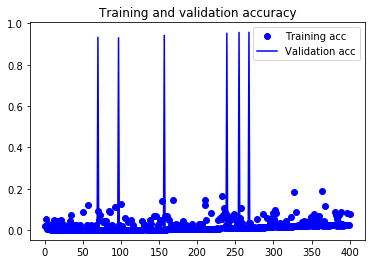

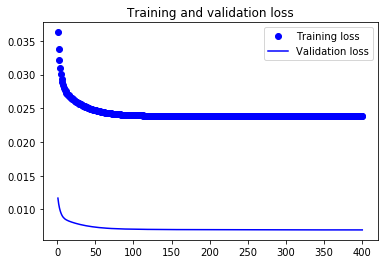

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [4]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)

800/800 [==============================] - 11s 14ms/step
Test accuracy: 0.003412109356140718
Test loss: 0.004978430719929748
